In [1]:
#import libararies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


(956,)


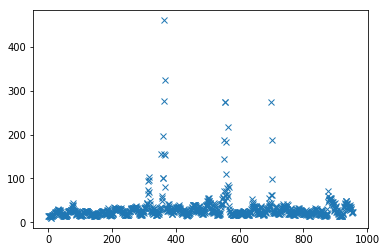

In [2]:
fileName = 'Training_Data.csv'
rawTrainingData = pd.read_csv(fileName).values
f = rawTrainingData[:,[6]] 
f = f.flatten()
print(f.shape)
plt.plot(f, 'x')

(901,)


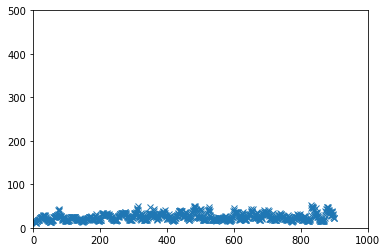

In [3]:

Q1=np.percentile(f, 25) ; # the value 25 is fixed for every problem;
Q3=np.percentile(f, 75) ; # the value 25 is fixed for every problem;
r=[Q1-1.5*(Q3-Q1),Q3+1.5*(Q3-Q1)];
pos = np.concatenate((np.where(f>r[1]),np.where(f<r[0])),axis=1)
newData = np.delete(rawTrainingData, pos, axis=0)

g = newData[:,[6]] 
g = g.flatten()
print(g.shape)
plt.xlim(0, 1000) # use the same axes setting as the above figure (with three outliers) to better reflect the difference
plt.ylim(0, 500)
plt.plot(g, 'x')
np.savetxt('ProcessedTrainingData.csv', newData, fmt='%.2f', delimiter=',', header=" T(t-2),T(t-1),T(t),D(t-2),D(t-1),D(t),P(t+1)")

(485,)


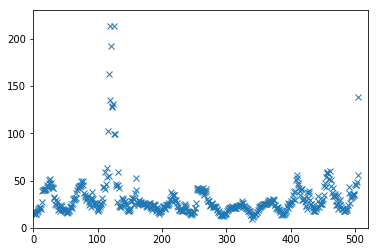

In [4]:
fileName = 'Testing_Data.csv'
rawTestingData = pd.read_csv(fileName).values
f = rawTestingData[:,[6]] 
f = f.flatten()
plt.xlim(0, 520) # use the same axes setting as the above figure (with three outliers) to better reflect the difference
plt.ylim(0, 230)
plt.plot(f, 'x')
Q1=np.percentile(f, 25) ; # the value 25 is fixed for every problem;
Q3=np.percentile(f, 75) ; # the value 25 is fixed for every problem;
r=[Q1-1.5*(Q3-Q1),Q3+1.5*(Q3-Q1)];
pos = np.concatenate((np.where(f>r[1]),np.where(f<r[0])),axis=1)
newTestingData = np.delete(rawTestingData, pos, axis=0)
g = newTestingData[:,[6]] 
g = g.flatten()
print(g.shape)

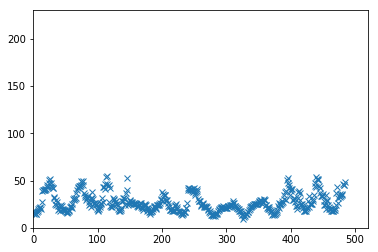

In [5]:
plt.xlim(0, 520) # use the same axes setting as the above figure (with three outliers) to better reflect the difference
plt.ylim(0, 230)
plt.plot(g, 'x')

In [6]:
np.savetxt('ProcessedTestingData.csv', newTestingData, fmt='%.2f', delimiter=',', header=" T(t-2),T(t-1),T(t),D(t-2),D(t-1),D(t),P(t+1)")



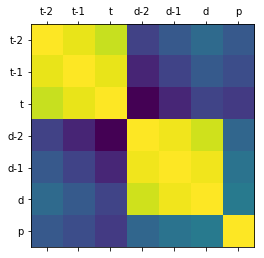

In [7]:
a = newData[:,[0]] # T(t-2)
a = a.flatten()
b = newData[:,[1]] # T(t-1)
b = b.flatten()
c = newData[:,[2]] #T(t)
c = c.flatten()
d1 = newData[:,[3]] #D(t-2)
d1 = d1.flatten()
d2 = newData[:,[4]] #D(t-1)
d2 = d2.flatten()
d3 = newData[:,[5]] #D(t)
d3 = d3.flatten()
p = newData[:,[6]] # price
p = p.flatten()

v = np.array([a,b,c,d1,d2,d3,p])
CCM=np.corrcoef(v)
plt.matshow(CCM)
groups= ['t-2','t-1','t','d-2','d-1', 'd', 'p']
x_pos = np.arange(len(groups))
plt.xticks(x_pos,groups)
 
y_pos = np.arange(len(groups))
plt.yticks(y_pos,groups)
 
plt.show()

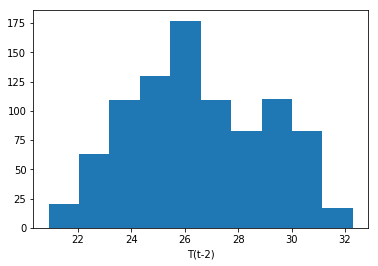

In [8]:
temperature = a


plt.hist(temperature)
plt.xlabel('T(t-2)');



/Users/rpsr15/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


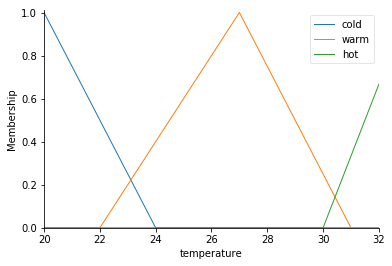

In [9]:

temperature = ctrl.Antecedent(np.arange(20,33,1), 'temperature')
#temperature.automf(names=['cold', 'warm', 'hot'])
t_cold = fuzz.trimf(temperature.universe, [20, 20, 24])
temperature['cold'] = t_cold
t_warm = fuzz.trimf(temperature.universe, [22, 27, 31])
temperature['warm'] = t_warm
t_hot = fuzz.trimf(temperature.universe, [30, 33, 33])
temperature['hot'] = t_hot
temperature.view()



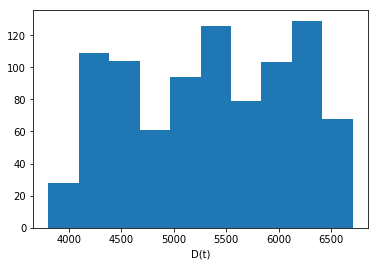

In [10]:
demand = d3


plt.hist(demand)
plt.xlabel('D(t)');



/Users/rpsr15/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


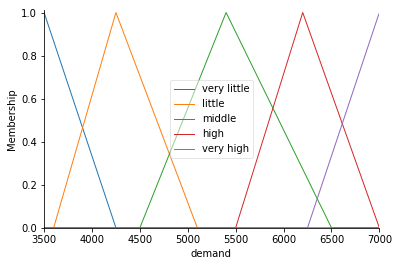

In [11]:
demand = ctrl.Antecedent(np.arange(3500,7000,5), 'demand')
#demand.automf(names=['very little', 'little', 'middle', 'high','very high'])
d_verylittle = fuzz.trimf(demand.universe, [3500, 3500, 4250])
demand['very little'] = d_verylittle
d_little = fuzz.trimf(demand.universe, [3600, 4250, 5100])
demand['little'] = d_little
d_middle = fuzz.trimf(demand.universe, [4500, 5400, 6500])
demand['middle'] = d_middle
d_high = fuzz.trimf(demand.universe, [5500, 6200, 7000])
demand['high'] = d_high
d_veryhigh = fuzz.trimf(demand.universe, [6250, 7000, 7000])
demand['very high'] = d_veryhigh


demand.view()

/Users/rpsr15/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


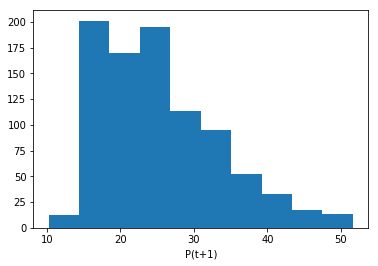

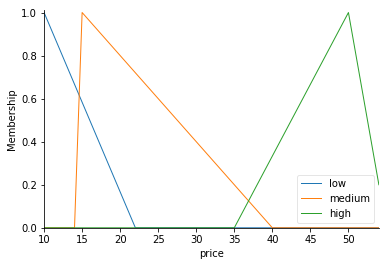

In [12]:
prices = p
plt.hist(prices)
plt.xlabel('P(t+1)');
prices = ctrl.Consequent(np.arange(10,55,1), 'price')
#prices.automf(names=['low', 'medium', 'high'])
p_low= fuzz.trimf(prices.universe, [10,10, 22])
prices['low'] = p_low
p_medium = fuzz.trimf(prices.universe, [14, 15,40])
prices['medium'] = p_medium
p_high = fuzz.trimf(prices.universe, [35, 50, 55])
prices['high'] = p_high

prices.view()



In [13]:

def getRule(temp, dmd, prc):
    #calculate membeship for temperature
    m_t_cold = fuzz.interp_membership(temperature.universe,t_cold, temp)
    m_t_warm = fuzz.interp_membership(temperature.universe,t_warm, temp)
    m_t_hot = fuzz.interp_membership(temperature.universe,t_hot, temp)
    temp_t = [m_t_cold, m_t_warm, m_t_hot]
    max_t = max(temp_t)
    temp_t = temp_t.index(max_t)
    
    #calculate membership for demand
    m_d_vl = fuzz.interp_membership(demand.universe,d_verylittle, dmd)
    m_d_l = fuzz.interp_membership(demand.universe,d_little, dmd)
    m_d_m = fuzz.interp_membership(demand.universe,d_middle, dmd)
    m_d_h = fuzz.interp_membership(demand.universe,d_high, dmd)
    m_d_vh = fuzz.interp_membership(demand.universe,d_veryhigh, dmd)
    temp_d = [m_d_vl, m_d_l, m_d_m, m_d_h, m_d_vh]
    max_d = max(temp_d)
    temp_d = temp_d.index(max_d)
    #calculate for price
    
    m_p_l = fuzz.interp_membership(prices.universe,p_low, prc)
    m_p_m = fuzz.interp_membership(prices.universe,p_medium, prc)
    m_p_h = fuzz.interp_membership(prices.universe,p_high, prc)
    temp_p = [m_p_l, m_p_m, m_p_h]
    max_p = max(temp_p)
    temp_p = temp_p.index(max_p)
    
    
    degreeRule = max_t * max_d * max_p
    rule_string = "{}{}{}".format(temp_t, temp_d, temp_p) 
    tup1 = (rule_string, degreeRule)
    return tup1



In [14]:
rulebase = {"000":0.5}
print(a.size)
for i in range(a.size):
    
    rule_result = getRule(a[i], d3[i], p[i])
    if rule_result[0] == "202":
        print(rule_result)
    #print(rule_result[0],rule_result[1])
    if rule_result[0] in rulebase:
        if rule_result[1] > rulebase[rule_result[0]]:
            rulebase[rule_result[0]] = rule_result[1] * rulebase[rule_result[0]]
            #print("upgrading",(rule_result[1] * rulebase[rule_result[0]]))
        
    else:
        rulebase[rule_result[0]] = rule_result[1]
  

901


In [15]:
print(rulebase)
final_rules = {"00":(0, 1.0)}
for rule_s, rule_de in rulebase.items():
    in_val = rule_s[:2]
    out_val = rule_s[2]
    dd = round(rule_de,6)
    print(in_val, out_val, dd)
    
    #if alrready there check for degree of rule
    if in_val in final_rules:
        if dd > final_rules[in_val][1]:
            final_rules[in_val] = (out_val, dd)
    #else add to final rules
    else:
        #temp_st = 
        final_rules[in_val] = (out_val, dd) 

{'000': 0.5, '111': 2.6702984932864915e-92, '110': 4.9180973200859535e-06, '010': 3.2248825339671315e-05, '011': 5.0583308894068e-22, '121': 1.1564708559913327e-185, '131': 1.5199981441077664e-117, '231': 3.0976268855909753e-35, '232': 4.174806855580983e-09, '242': 0.0003423542172760666, '142': 0.022461039999999977, '241': 0.03795744888888891, '221': 4.651907101908147e-08, '132': 7.02183369952449e-33, '141': 0.09497822399999989, '122': 3.575082858734942e-21, '031': 0.0, '032': 0.06049874999999993, '021': 1.5101299189556225e-19, '022': 0.06467983333333338, '211': 0.0005025834571560095, '222': 0.005957871638296341, '101': 0.0005482724362000277, '100': 0.2279588888888889}
00 0 0.5
11 1 0.0
11 0 5e-06
01 0 3.2e-05
01 1 0.0
12 1 0.0
13 1 0.0
23 1 0.0
23 2 0.0
24 2 0.000342
14 2 0.022461
24 1 0.037957
22 1 0.0
13 2 0.0
14 1 0.094978
12 2 0.0
03 1 0.0
03 2 0.060499
02 1 0.0
02 2 0.06468
21 1 0.000503
22 2 0.005958
10 1 0.000548
10 0 0.227959


In [16]:
print(final_rules)

{'00': (0, 1.0), '11': ('0', 5e-06), '01': ('0', 3.2e-05), '12': ('1', 0.0), '13': ('1', 0.0), '23': ('1', 0.0), '24': ('1', 0.037957), '14': ('1', 0.094978), '22': ('2', 0.005958), '03': ('2', 0.060499), '02': ('2', 0.06468), '21': ('1', 0.000503), '10': ('0', 0.227959)}


In [17]:
rule1 = ctrl.Rule(temperature['cold'] & demand['very little'], prices['low'])
rule2 = ctrl.Rule(temperature['cold'] & demand['little'], prices['low'])
rule3 = ctrl.Rule(temperature['cold'] & demand['middle'], prices['high'])
rule4 = ctrl.Rule(temperature['cold'] & demand['high'], prices['high'])
rule5 = ctrl.Rule(temperature['cold'] & demand['very high'], prices['high'])
rule6 = ctrl.Rule(temperature['warm'] & demand['very little'], prices['low'])
rule7 = ctrl.Rule(temperature['warm'] & demand['little'], prices['low'])
rule8 = ctrl.Rule(temperature['warm'] & demand['middle'], prices['medium'])
rule9 = ctrl.Rule(temperature['warm'] & demand['high'], prices['medium'])
rule10 = ctrl.Rule(temperature['warm'] & demand['very high'], prices['medium'])
rule11 = ctrl.Rule(temperature['hot'] & demand['very little'], prices['low'])
rule12 = ctrl.Rule(temperature['hot'] & demand['little'], prices['low'])
rule13 = ctrl.Rule(temperature['hot'] & demand['middle'], prices['high'])
rule14 = ctrl.Rule(temperature['hot'] & demand['high'], prices['high'])
rule15 = ctrl.Rule(temperature['hot'] & demand['very high'], prices['high'])
prices_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

price_simulation = ctrl.ControlSystemSimulation(prices_ctrl)

In [18]:
#calculate membeship for temperature
temp = 25.9
dmd = 4507
m_t_cold = fuzz.interp_membership(temperature.universe,t_cold, temp)
m_t_warm = fuzz.interp_membership(temperature.universe,t_warm, temp)
m_t_hot = fuzz.interp_membership(temperature.universe,t_hot, temp)
temp_t = [m_t_cold, m_t_warm, m_t_hot]
print(temp_t)
    
    #calculate membership for demand
m_d_vl = fuzz.interp_membership(demand.universe,d_verylittle, dmd)
m_d_l = fuzz.interp_membership(demand.universe,d_little, dmd)
m_d_m = fuzz.interp_membership(demand.universe,d_middle, dmd)
m_d_h = fuzz.interp_membership(demand.universe,d_high, dmd)
m_d_vh = fuzz.interp_membership(demand.universe,d_veryhigh, dmd)
temp_d = [m_d_vl, m_d_l, m_d_m, m_d_h, m_d_vh]
print(temp_d)
    
m_p_l = fuzz.interp_membership(prices.universe,p_low, 23.87)
m_p_m = fuzz.interp_membership(prices.universe,p_medium, 23.87)
m_p_h = fuzz.interp_membership(prices.universe,p_high, 23.87)
temp_p = [m_p_l, m_p_m, m_p_h]
print(temp_p)

[0.0, 0.7799999999999998, 0.0]
[0.0, 0.6976470588235294, 0.0077777777777777776, 0.0, 0.0]
[0.0, 0.6452, 0.0]


In [19]:
#testing data
#finalTestingData = pd.read_csv("ProcessedTestingData.csv").values
##finalTestingData = finalTestingData[:,(0,5,6)]
#finalTestingData.shape

t_in =25.8
d_int = 4507
price_simulation.input['temperature'] = t_in
price_simulation.input['demand'] = d_int
price_simulation.compute()
sim_out = price_simulation.output['price']

print(sim_out)

14.700824248411239


In [20]:
finalTestingData = pd.read_csv("ProcessedTrainingData.csv").values
finalTestingData = finalTestingData[:,(0,5,6)]
print(finalTestingData.shape[0])


901


In [21]:
System_outputs=np.zeros(finalTestingData.shape[0],dtype=np.float64)
i = 0
sum = 0
for t_val in finalTestingData:
    price_simulation.input['temperature'] = t_val[0]
    price_simulation.input['demand'] = t_val[1]
    price_simulation.compute()
    sim_out = price_simulation.output['price']
    diff = abs(t_val[2] - (sim_out))
    
    div  = diff/t_val[2]
    sum += div
    #if diff >= 10:
        
        #print(t_val,"expected:",t_val[2],"actual:",sim_out,"diff:",diff)
    System_outputs[i]=sim_out
    i += 1

# Crunch the numbers
print(sum)
print(sum/finalTestingData.shape[0])

190.247520818753
0.21115152144145727
